# Chemical Engineering Problem Solver - Calculation of Efficiency of Rankine Vapor Power Cycle


***************** State 1 ******************

  water:

       temperature   300 K
          pressure   3528.2 Pa
           density   996.59 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0
   phase of matter   liquid-gas-mix

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.5858e+07        -2.857e+08  J
   internal energy       -1.5858e+07        -2.857e+08  J
           entropy            3913.2             70500  J/K
    Gibbs function       -1.7032e+07       -3.0685e+08  J
 heat capacity c_p            4181.3             75330  J/K
 heat capacity c_v              4131             74425  J/K


***************** State 2 ******************

  water:

       temperature   300.14 K
          pressure   8e+05 Pa
           density   996.91 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0
   phase of matter   liquid

                          1 kg             1 kmol

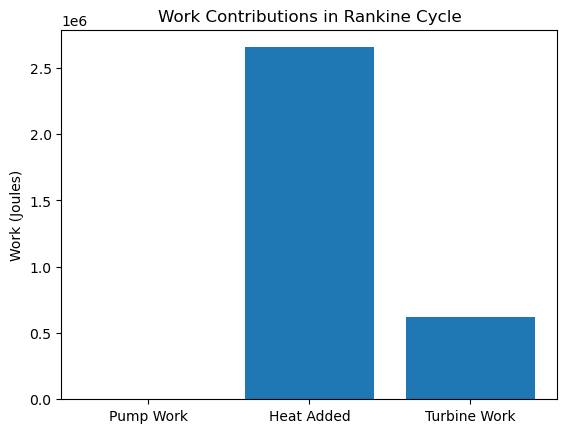

In [15]:
import matplotlib.pyplot as plt
import cantera as ct

# parameters
eta_pump = 0.6     # pump isentropic efficiency
eta_turbine = 0.8  # turbine isentropic efficiency
p_max = 8.0e5       # maximum pressure


def pump(fluid, p_final, eta):
    """Adiabatically pump a fluid to pressure p_final, using
    a pump with isentropic efficiency eta."""
    h0 = fluid.h
    s0 = fluid.s
    fluid.SP = s0, p_final
    h1s = fluid.h
    isentropic_work = h1s - h0
    actual_work = isentropic_work / eta
    h1 = h0 + actual_work
    fluid.HP = h1, p_final
    return actual_work


def expand(fluid, p_final, eta):
    """Adiabatically expand a fluid to pressure p_final, using
    a turbine with isentropic efficiency eta."""
    h0 = fluid.h
    s0 = fluid.s
    fluid.SP =s0, p_final
    h1s = fluid.h
    isentropic_work = h0 - h1s
    actual_work = isentropic_work * eta
    h1 = h0 - actual_work
    fluid.HP = h1, p_final
    return actual_work


def printState(n, fluid):
    print('\n***************** State {0} ******************'.format(n))
    print(fluid.report())


if __name__ == '__main__':
    # create an object representing water
    w = ct.Water()

    # start with saturated liquid water at 300 K
    w.TQ = 300.0, 0.0
    h1 = w.h
    p1 = w.P
    printState(1, w)

    # pump it adiabatically to p_max
    pump_work = pump(w, p_max, eta_pump)
    h2 = w.h
    printState(2, w)

    # heat it at constant pressure until it reaches the saturated vapor state
    # at this pressure
    w.PQ = p_max, 1.0
    h3 = w.h
    heat_added = h3 - h2
    printState(3, w)

    # expand back to p1
    turbine_work = expand(w, p1, eta_turbine)
    printState(4, w)

    # efficiency
    eff = (turbine_work - pump_work)/heat_added

    print('efficiency = ', eff)
    
# Create a bar chart to visualize work contributions
labels = ['Pump Work', 'Heat Added', 'Turbine Work']
values = [pump_work, heat_added, turbine_work]

plt.bar(labels, values)
plt.ylabel('Work (Joules)')
plt.title('Work Contributions in Rankine Cycle')
plt.show()